In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Extração unitaria

In [2]:
website_url = requests.get('https://pt.wikipedia.org/wiki/S%C3%A3o_Paulo_(estado)').text
soup = BeautifulSoup(website_url,'lxml')
# print(soup.prettify())

My_table = soup.find('table')

In [3]:
i =0
links = My_table.find(title="Fronteira")
texto = []
hrefs = []

while links.find_next('a').text != "Regiões geográficas intermediárias":
    links = links.find_next('a')
    texto.append(links.text)
    hrefs.append(links.get('href'))

        
df = pd.DataFrame([texto, hrefs] ).T
df.columns = ['Estado_Vizinho', 'link_wikipedia']
df

,Estado_Vizinho,link_wikipedia
0,Paraná,/wiki/Paran%C3%A1
1,Mato Grosso do Sul,/wiki/Mato_Grosso_do_Sul
2,Minas Gerais,/wiki/Minas_Gerais
3,Rio de Janeiro,/wiki/Rio_de_Janeiro_(estado)


# Looping

In [4]:
links_visitados =['https://pt.wikipedia.org//wiki/Norte',
                  'https://pt.wikipedia.org//wiki/Sul',
                  'https://pt.wikipedia.org//wiki/Oeste',
                  'https://pt.wikipedia.org//wiki/ol%C3%ADvia','https://pt.wikipedia.org//wiki/Bol%C3%ADvia',
                  'https://pt.wikipedia.org//wiki/Paraguai',
                  'https://pt.wikipedia.org//wiki/Guiana',
                  'https://pt.wikipedia.org//wiki/Guiana_Francesa',
                  'https://pt.wikipedia.org//wiki/Suriname',
                  'https://pt.wikipedia.org//wiki/Venezuela',
                  'https://pt.wikipedia.org//wiki/Col%C3%B4mbia',
                  'https://pt.wikipedia.org//wiki/Peru',
                  'https://pt.wikipedia.org//wiki/Fran%C3%A7a',
                  'https://pt.wikipedia.org/#cite_note-principal-1']

def extrai_vizinhos(origem, nome_origem):
    
    if sum([origem == x for x in links_visitados]) <1: #Evitar ler link repetidas vezes
        links_visitados.append(origem)
        trechos = BeautifulSoup(requests.get(origem).text,'lxml').find('table').find(title="Fronteira")

        texto = []
        hrefs = []

        while trechos.find_next('a').text not in ["População","Regiões geográficas intermediárias"]:
            trechos = trechos.find_next('a')
            texto.append(trechos.text)
            hrefs.append(trechos.get('href'))

        df = pd.DataFrame([texto, hrefs] ).T
        df.columns = ['Estado_Vizinho', 'link_wikipedia']
        df['origem'] = nome_origem

        radical = "https://pt.wikipedia.org/"
        df['link_wiki_full'] = radical + df['link_wikipedia']

        return(df)

In [5]:
#Inicializo com um ponto conhecido
df_sp = extrai_vizinhos('https://pt.wikipedia.org/wiki/Bahia', 'Bahia')

for i in range(4):
    df_sp0 = df_sp[['link_wiki_full','Estado_Vizinho']].drop_duplicates()
    for i in range(0, len(df_sp0)):
        df_row = extrai_vizinhos(df_sp0.iloc[i]['link_wiki_full'], df_sp0.iloc[i]['Estado_Vizinho'])
        df_sp=df_sp.append(df_row)

In [11]:
#Retiro paises da lista de estados e desprezo duplicadas
paises= ['N', 'S', 'O', 'Bolívia', 'Paraguai','Guiana', 'Suriname','Venezuela', 'Colômbia',
 'Argentina','Peru', 'França', 'Guiana Francesa', '[1]']

estados_final = df_sp[~df_sp['Estado_Vizinho'].isin(paises)].drop_duplicates().reset_index(drop=True)
estados_final


,Estado_Vizinho,link_wikipedia,origem,link_wiki_full
0,Minas Gerais,/wiki/Minas_Gerais,Bahia,https://pt.wikipedia.org//wiki/Minas_Gerais
1,Goiás,/wiki/Goi%C3%A1s,Bahia,https://pt.wikipedia.org//wiki/Goi%C3%A1s
2,Tocantins,/wiki/Tocantins,Bahia,https://pt.wikipedia.org//wiki/Tocantins
3,Piauí,/wiki/Piau%C3%AD,Bahia,https://pt.wikipedia.org//wiki/Piau%C3%AD
4,Pernambuco,/wiki/Pernambuco,Bahia,https://pt.wikipedia.org//wiki/Pernambuco
5,Alagoas,/wiki/Alagoas,Bahia,https://pt.wikipedia.org//wiki/Alagoas
6,Sergipe,/wiki/Sergipe,Bahia,https://pt.wikipedia.org//wiki/Sergipe
7,Espírito Santo,/wiki/Esp%C3%ADrito_Santo_(estado),Bahia,https://pt.wikipedia.org//wiki/Esp%C3%ADrito_S...
8,São Paulo,/wiki/S%C3%A3o_Paulo_(estado),Minas Gerais,https://pt.wikipedia.org//wiki/S%C3%A3o_Paulo_...
9,Mato Grosso do Sul,/wiki/Mato_Grosso_do_Sul,Minas Gerais,https://pt.wikipedia.org//wiki/Mato_Grosso_do_Sul


In [7]:
#Verifico a quantidade de estados
len(estados_final['origem'].unique())

26

In [8]:
# Quantidade de estados vizinhos por estado
contagem = estados_final.groupby('origem').Estado_Vizinho.count()
contagem

origem
Acre                   2
Alagoas                3
Amapá                  1
Amazonas               5
Bahia                  8
Ceará                  4
Distrito Federal       2
Espírito Santo         3
Goiás                  6
Maranhão               3
Mato Grosso            6
Mato Grosso do Sul     5
Minas Gerais           7
Paraná                 3
Paraíba                3
Pará                   6
Pernambuco             5
Piauí                  5
Rio Grande do Norte    2
Rio de Janeiro         3
Rondônia               3
Roraima                2
Santa Catarina         2
Sergipe                2
São Paulo              4
Tocantins              6
Name: Estado_Vizinho, dtype: int64

# Grafo

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

In [13]:
G = nx.Graph()
G = nx.from_pandas_edgelist(df=estados_final, source='Estado_Vizinho', target='origem', edge_attr='link_wiki_full')

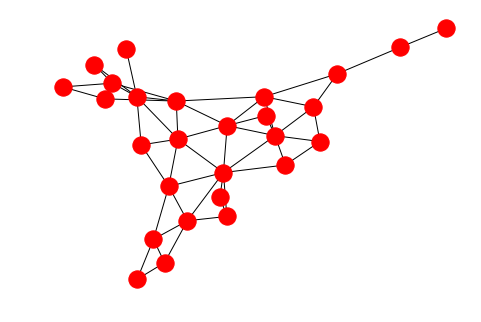

In [18]:
nx.draw(G)
plt.show()